# Week 09 Root finding
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 28.3.2017  
Helsinki Metropolia University of Applied Sciences

In [28]:
# Initial import statements
%pylab inline
from scipy.optimize import bisect, newton

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Reference

Johansson (2015). [Numerical Python: A Practical Techniques Approach for Industry](https://metropolia.finna.fi/Record/nelli15.3710000000486209) 
- [Ch. Plotting and Visualization](https://link-springer-com.ezproxy.metropolia.fi/content/pdf/10.1007%2F978-1-4842-0553-2_4.pdf)
- [Ch. Equation Solving](https://link-springer-com.ezproxy.metropolia.fi/content/pdf/10.1007%2F978-1-4842-0553-2_5.pdf)

## Exercise 1
Draw a graphical presentation of the following functions within a domain $x \in [−2; 2]$ and observe how many roots $(f(x) = 0)$ each function has and where they approximately locate  
$
(a)\ f_1(x) = x^2 - x - 1 \\
(b)\ f_2(x) = x^3 - 3\sin(x) \\  
(c)\ f_3(x) = e^x - 2 \\
(d)\ \displaystyle  f_4(x) = 1 - x^2 + \sin\bigg(\frac{50}{1+x^2}\bigg) 
$

## Solution
For this problem, we have an elegant solution from Johansson (2015) p. 137. First we define 4 lambda functions, then plot the functions on the domain $x\in [-2;2]$ in 4 subplots with the addition the grid and the horizontal line at $y = 0$.

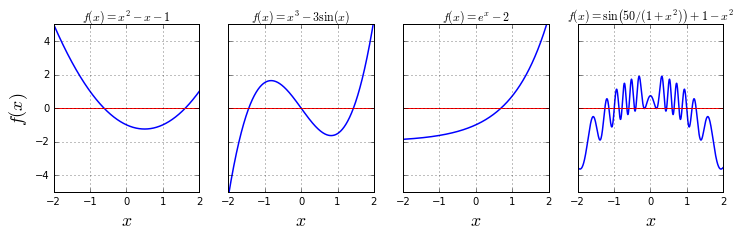

In [29]:
f1 = lambda x: x**2 - x - 1
f2 = lambda x: x**3 - 3 * sin(x)
f3 = lambda x: exp(x) - 2
f4 = lambda x: 1 - x**2 + sin(50 / (1 + x**2))

x = linspace(-2, 2, 1000)
fig, axes = subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f(x), lw=1.5)
    axes[n].axhline(0, color='r')
    axes[n].grid()
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
axes[0].set_ylabel(r'$f(x)$', fontsize=18)
titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$', r'$f(x)=e^x-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

## Exercise 2
Write a function that incrementally search the root of a function. It should use 4 arguments, $f$ the function, $a$ the lower and $b$ the upper limits of the search domain, and $dx$ the step of the increment. The function returns the estimate for the root, $x_0$, and the number of steps, $n$, needed to find the root.  
Test your incremental search function with the example functions given in problem 1. How many incremental steps are needed to find the first root with the step size of 0.01?

## Solution
Using `incrementSearch` to find the first root of a function on the given domain, we start with $x$ at the lower limit $a$ and keep on adding $dx$ into $x$ and increasing the number of steps until the sign of the function changes, which means the function has crossed the x axis and we detected a root. Finally we return the root and the number of steps as required. If the value of $x$ surpasses the upper limit $b$, no root was detected.

In [30]:
def incrementSearch(f, a, b, dx):
    """
    Inputs:
       f = the function 
       a = lower limit of the domain
       b = upper limit of the domain
       dx = step of the increment
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    x = a
    n = 0
    while (x < b):
        if sign(f(x)) != sign(f(x + dx)):
            return x + dx, n + 1
        x += dx    
        n += 1

    return None, n

In [31]:
fs = [f1, f2, f3, f4]
i = 0

print("Increment search:")
for f in fs:
    i += 1
    x, n = incrementSearch(f, a = -2, b = 2, dx = 0.01)
    print("\tFunction f{}:".format(i))
    print("\t\tRoot x0 = {0:.4f}".format(x))
    print("\t\tNumber of steps n = {}".format(n))

Increment search:
	Function f1:
		Root x0 = -0.6100
		Number of steps n = 139
	Function f2:
		Root x0 = -1.4300
		Number of steps n = 57
	Function f3:
		Root x0 = 0.7000
		Number of steps n = 270
	Function f4:
		Root x0 = -1.2500
		Number of steps n = 75


## Exercise 3
Study the `bisect()` function found in module `scipy.optimize`. Use that function to find the roots of the problem 1. Use tolerance value of 0.01. How do these results differ from the results obtained in previous problem?

## Solution
`bisect()` finds a root of a function $f$ within the arguments $a$ and $b$. It will certainly find the root with a condition that $f(a)$ and $f(b)$ cannot have the same signs.
Which each function, we have to adjust the value of $a$ and $b$ to get the first root in the domain [-2, 2] so that we can compare the solution with the roots we found in exercise 2.  

In [32]:
# array of values of b for bisect() to find the first root of each function
b_s = [1, -1, 2, -1.2]
i = 0
print("Root found by scipy.optimize.bisect:")
for f in fs:
    i += 1
    x,r = bisect(f, a = -2, b = b_s[i-1], xtol=0.01, full_output=True)
    print("\tFunction f{}:".format(i))
    print("\t\tRoot x0 = {0:.4f}".format(x))
    print("\t\tNumber of steps n = {}".format(r.iterations))

Root found by scipy.optimize.bisect:
	Function f1:
		Root x0 = -0.6230
		Number of steps n = 9
	Function f2:
		Root x0 = -1.4453
		Number of steps n = 7
	Function f3:
		Root x0 = 0.6953
		Number of steps n = 9
	Function f4:
		Root x0 = -1.2563
		Number of steps n = 7


We could see that the roots found by `bisect` is similar to the ones from exercise 2. However the number of needed steps reduces significantly. 

## Exercise 4
Write your own function that implements the bisectional search method.  
Test your code with the mathematical functions given in problem 1 and compare the results with those obtained in problem 3. Are they similar?

## Solution
Within an interval $[a, b]$ that $f(a)$ and $f(b)$ have different signs, our `bisectSearch` method will certainly find a root.
In each iteration, the new value of $x_0$ is the middle point of the interval. Next, we get the value of the function at $x_0$, compare its sign with $f(a)$ and then change the value of $a$ or $b$ to get a new interval with half the size of the previous one so the function will converge toward a root. 

In [33]:
def bisectSearch(f, a, b, tol, maxiter):
    """ bisectSearch(f, a, b, tol, maxiter)
    My version of the bisectional root searching algorithm.
    Inputs:
       f = the function 
       a = lower limit of the domain
       b = upper limit of the domain
       tol = tolerance for the root value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the root
       n = number of iterations
    """
    x0, n = None, 0
    while (b - a > tol and n < maxiter):
        x0 = a + (b - a) / 2
        if sign(f(a)) == sign(f(x0)):
            a = x0
        else:
            b = x0   
        n += 1
    return x0, n  

In [34]:
i = 0
print("Root found by bisectSearch:")
for f in fs:
    i += 1
    x, n = bisectSearch(f, a = -2, b = b_s[i-1], tol = 0.01, maxiter = 200)
    print("\tFunction f{}:".format(i))
    print("\t\tRoot x0 = {0:.4f}".format(x))
    print("\t\tNumber of steps n = {}".format(n))

Root found by bisectSearch:
	Function f1:
		Root x0 = -0.6230
		Number of steps n = 9
	Function f2:
		Root x0 = -1.4453
		Number of steps n = 7
	Function f3:
		Root x0 = 0.6953
		Number of steps n = 9
	Function f4:
		Root x0 = -1.2563
		Number of steps n = 7


We could see that the roots found by our `bisectSearch` and the number of steps are exactly the same as what we obtained in exercise 3.